<a href="https://colab.research.google.com/github/rahfa-quraniyatin/Python_SVM_Classification/blob/main/Support_Vector_Machine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Data**

In [39]:
# import data
import pandas as pd

stunting_data = pd.read_csv('/content/data_balita.csv')
stunting_data.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


# **2. Pre-processing Data**

In [40]:
# rename coloumns
stunting_data = stunting_data.rename(columns={"Umur (bulan)":"Umur","Tinggi Badan (cm)":"Tinggi Badan"})
print(stunting_data)

        Umur Jenis Kelamin  Tinggi Badan       Status Gizi
0          0     laki-laki     44.591973           stunted
1          0     laki-laki     56.705203            tinggi
2          0     laki-laki     46.863358            normal
3          0     laki-laki     47.508026            normal
4          0     laki-laki     42.743494  severely stunted
...      ...           ...           ...               ...
120994    60     perempuan    100.600000            normal
120995    60     perempuan     98.300000           stunted
120996    60     perempuan    121.300000            normal
120997    60     perempuan    112.200000            normal
120998    60     perempuan    109.800000            normal

[120999 rows x 4 columns]


In [41]:
# check the data info
stunting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Umur           120999 non-null  int64  
 1   Jenis Kelamin  120999 non-null  object 
 2   Tinggi Badan   120999 non-null  float64
 3   Status Gizi    120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [42]:
# check the missing value
missing_values = stunting_data.isnull().sum()
print("Number of missing values:")
print(missing_values)

Number of missing values:
Umur             0
Jenis Kelamin    0
Tinggi Badan     0
Status Gizi      0
dtype: int64


In [43]:
# check the duplicates
duplicates = stunting_data[stunting_data.duplicated()]
print("Duplicate rows :")
print(duplicates)

Duplicate rows :
        Umur Jenis Kelamin  Tinggi Badan       Status Gizi
6012       3     laki-laki          62.1            normal
6014       3     laki-laki          59.2            normal
6027       3     laki-laki          61.4            normal
6031       3     laki-laki          71.0            tinggi
6032       3     laki-laki          51.5  severely stunted
...      ...           ...           ...               ...
120994    60     perempuan         100.6            normal
120995    60     perempuan          98.3           stunted
120996    60     perempuan         121.3            normal
120997    60     perempuan         112.2            normal
120998    60     perempuan         109.8            normal

[81574 rows x 4 columns]


In [44]:
# remove the duplicates
stunting_data1 = stunting_data.drop_duplicates()

# rechecking for duplicated data
stunting_data1.duplicated().sum()



0

In [45]:
# check the outlier

def check_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Tinggi Badan column:
outliers_tinggi_badan = check_outliers_iqr(stunting_data1, 'Tinggi Badan')
print("Outliers in 'Tinggi Badan':")
print(outliers_tinggi_badan)

# Umur column:
outliers_umur = check_outliers_iqr(stunting_data1, 'Umur')
print("Outliers in 'Umur':")
print(outliers_umur)

Outliers in 'Tinggi Badan':
Empty DataFrame
Columns: [Umur, Jenis Kelamin, Tinggi Badan, Status Gizi]
Index: []
Outliers in 'Umur':
Empty DataFrame
Columns: [Umur, Jenis Kelamin, Tinggi Badan, Status Gizi]
Index: []


In [46]:
# Label Encoding (for categorical columns)
# Function to perform label encoding on a specified column using a given mapping
def label_encoding(df, column, mapping):
    df[column] = df[column].map(mapping)
    return df

# Define mapping for 'Jenis Kelamin' column
# 'laki-laki' is mapped to 0 and 'perempuan' is mapped to 1
gender_mapping = {'laki-laki': 0, 'perempuan': 1}

# Define mapping for 'Status Gizi' column
status_gizi_mapping = {'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3}


stunting_data1 = label_encoding(stunting_data1, 'Jenis Kelamin', gender_mapping)
stunting_data1 = label_encoding(stunting_data1, 'Status Gizi', status_gizi_mapping)


print(stunting_data1.head())


   Umur  Jenis Kelamin  Tinggi Badan  Status Gizi
0     0              0     44.591973            1
1     0              0     56.705203            3
2     0              0     46.863358            2
3     0              0     47.508026            2
4     0              0     42.743494            0


<ipython-input-46-c09d82c072c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map(mapping)
<ipython-input-46-c09d82c072c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map(mapping)


In [47]:
# Standardization
from sklearn import preprocessing

# Initialize the StandardScaler
scaler = preprocessing.StandardScaler()

# Select numerical columns for scaling (exclude 'Status Gizi' and 'Jenis Kelamin')
numerical_cols = ['Umur', 'Tinggi Badan']

# Fit and transform the numerical columns
stunting_data1[numerical_cols] = scaler.fit_transform(stunting_data1[numerical_cols])

print(stunting_data1.head())

       Umur  Jenis Kelamin  Tinggi Badan  Status Gizi
0 -1.469424              0     -2.096915            1
1 -1.469424              0     -1.484093            3
2 -1.469424              0     -1.982003            2
3 -1.469424              0     -1.949388            2
4 -1.469424              0     -2.190431            0


<ipython-input-47-b665bfa311eb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stunting_data1[numerical_cols] = scaler.fit_transform(stunting_data1[numerical_cols])


# **3. Exploratory Data Analysis (EDA)**

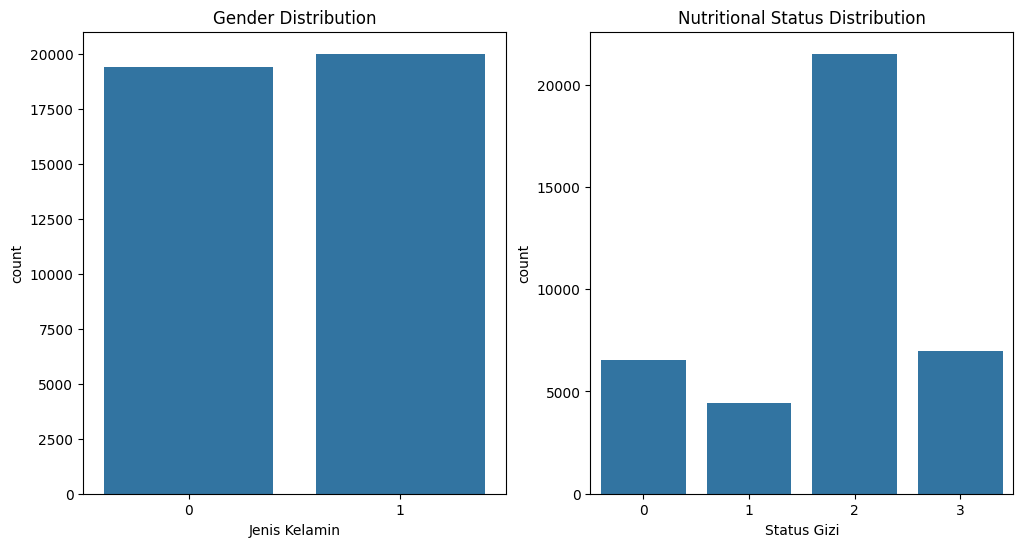

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plots for categorical variable

# Gender distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Jenis Kelamin', data=stunting_data1)
plt.title('Gender Distribution')

# Nutritional Status Distribution
plt.subplot(1, 2, 2)
sns.countplot(x='Status Gizi', data=stunting_data1)
plt.title('Nutritional Status Distribution')
plt.show()


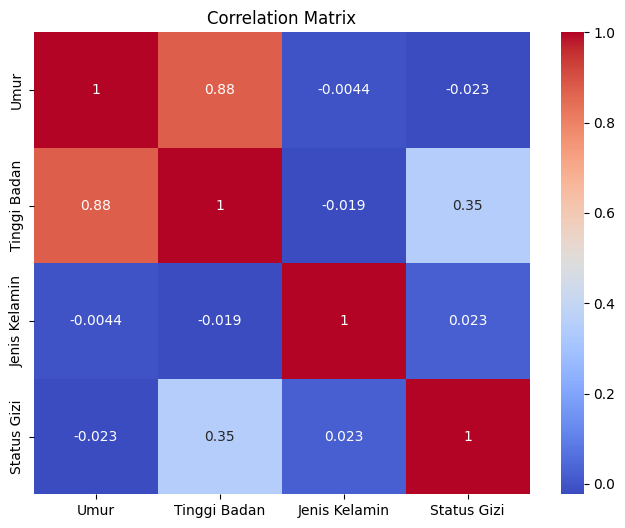

In [49]:
# Correlation matrix
correlation_matrix = stunting_data1[['Umur', 'Tinggi Badan',
                                     'Jenis Kelamin', 'Status Gizi']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **4. Modelling and Evaluation**

In [50]:
# Declare feature vector and target variable
X = stunting_data1.drop(['Status Gizi'], axis=1)
y = stunting_data1['Status Gizi']

In [51]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((31540, 3), (7885, 3))

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Function to perform SVM with different kernels
def perform_svm(X_train, X_test, y_train, y_test, kernel='linear', C=1, gamma='scale'):
    # Initialize the SVC model with specified kernel, C, and gamma
    svm_classifier = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42)
    # Fit the model to the training data
    svm_classifier.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = svm_classifier.predict(X_test)
    # Calculate accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    # Print the accuracy of the current kernel
    print(f"Accuracy with {kernel} : {accuracy * 100:.2f}%")
    return accuracy, y_pred


# Define different kernel types to evaluate
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

# Iterate through each kernel type and evaluate the SVM model
for kernel in kernels:
    accuracy, y_pred = perform_svm(X_train, X_test, y_train, y_test, kernel=kernel)
    results[kernel] = {'accuracy': f'{accuracy * 100:.2f}%', 'predictions': y_pred}

# Identify the kernel with the highest accuracy
best_kernel = max(results, key=lambda k: results[k]['accuracy'])
best_predictions = results[best_kernel]['predictions']
print(f"\nBest performing kernel: {best_kernel} with accuracy: {results[best_kernel]['accuracy']}")

# Evaluate the best-performing model with a detailed classification reportl
print(f"\nClassification Report for {best_kernel}:")
print(classification_report(y_test, best_predictions))



Accuracy with linear : 71.64%
Accuracy with rbf : 97.03%
Accuracy with poly : 84.19%
Accuracy with sigmoid : 46.39%

Best performing kernel: rbf with accuracy: 97.03%

Classification Report for rbf:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1330
           1       0.96      0.86      0.91       838
           2       0.97      0.99      0.98      4339
           3       0.98      0.96      0.97      1378

    accuracy                           0.97      7885
   macro avg       0.97      0.95      0.96      7885
weighted avg       0.97      0.97      0.97      7885



In [54]:
# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the SVM model
# 'C' controls the trade-off between smooth decision boundary and correct classification
# 'gamma' defines how far the influence of a single training example reaches (used in RBF kernel)
# 'kernel' specifies the type of kernel to use; here, we use the best kernel determined earlier (e.g., 'rbf')
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': [best_kernel]}

# Initialize GridSearchCV with SVC as the estimator
# 'param_grid' specifies the parameter combinations to try
# 'refit=True' ensures the best model (based on cross-validation) is refitted on the entire training set
# 'verbose=3' displays detailed logs during the fitting process
grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=3)

# Fit the model on the training data with different hyperparameter combinations
grid.fit(X_train, y_train)

# Print the best hyperparameters found during the search
print(f"\nBest parameters : {grid.best_params_}")

# Print the best estimator (model with the optimal hyperparameters)
print(f"\nBest estimator : {grid.best_estimator_}")

# Use the best model to make predictions on the test set
grid_predictions = grid.predict(X_test)

# Print the classification report for the model with the best hyperparameters
print(f"\nClassification Report for {grid.best_params_} :")
print(classification_report(y_test, grid_predictions))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.942 total time=  14.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=  14.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.944 total time=  14.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.939 total time=  15.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=  15.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=  21.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=  23.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.903 total time=  24.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=  21.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.908 total time=  22.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.590 total time=  30.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

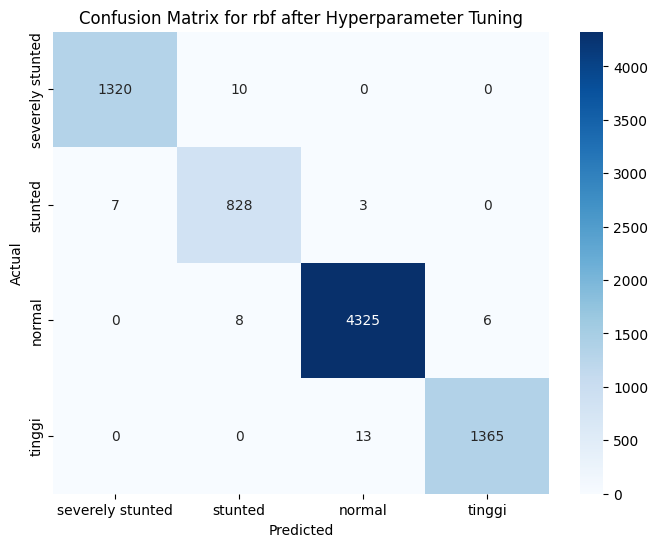

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for the model after hyperparameter tuning
conf_matrix_grid = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_grid, annot=True, fmt="d", cmap="Blues",
            xticklabels=['severely stunted', 'stunted', 'normal', 'tinggi'],
            yticklabels=['severely stunted', 'stunted', 'normal', 'tinggi'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix for {best_kernel} after Hyperparameter Tuning")
plt.show()